<a href="https://colab.research.google.com/github/Aswathy02/python1/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data representaion
import pandas as pd
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# size of dataset
df.shape

(4340, 8)

In [ ]:
# Differentiate each car
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [ ]:
# checking Null value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# Describing calculated statistical terms
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
# Data representaion(neglecting unnecessart columns)
final_dataset = df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# Adding features
final_dataset['current_year'] = 2022
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,2022


In [ ]:
final_dataset['car_age'] = final_dataset['current_year'] - final_dataset['year']
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,current_year,car_age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,2022,8


In [ ]:
final_dataset.drop(['year'], axis = 1, inplace = True)
final_dataset.drop(['current_year'], axis = 1, inplace = True)
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [ ]:
final_dataset = pd.get_dummies(final_dataset,drop_first = True)
final_dataset.head()

,selling_price,km_driven,Current_Year,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


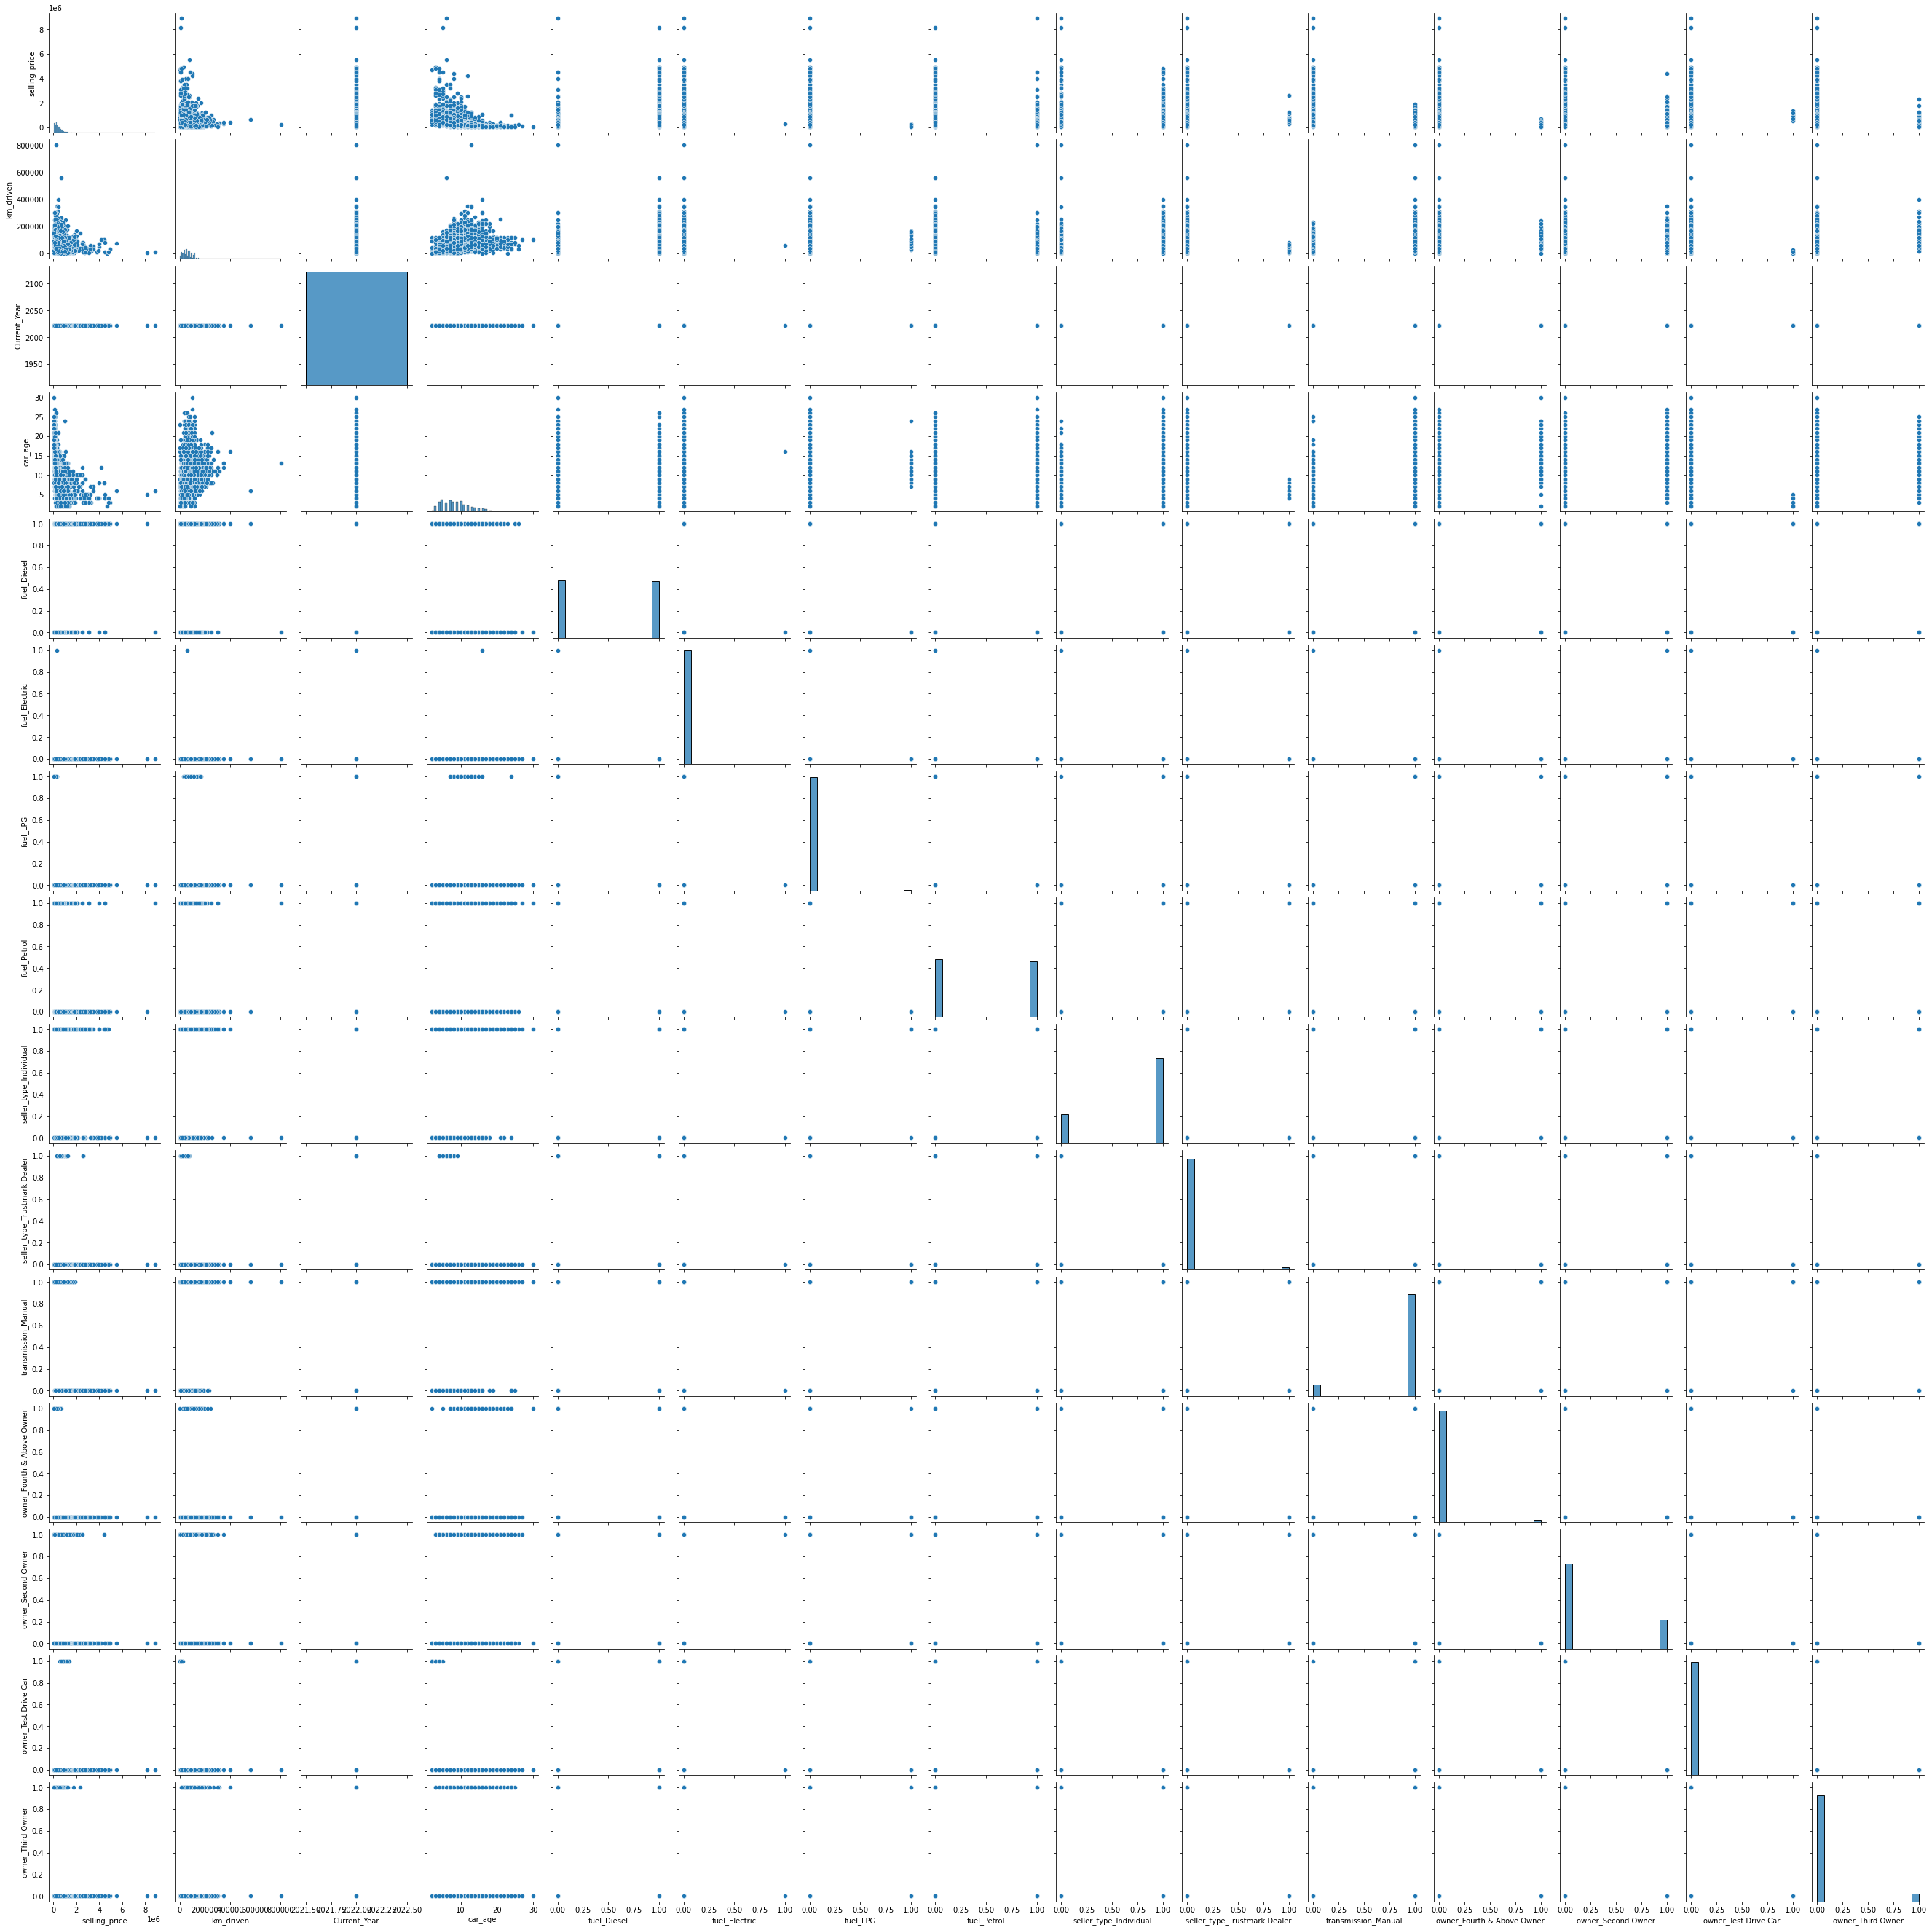

In [ ]:
# Data visualization
import seaborn as sbs
sbs.pairplot(final_dataset)

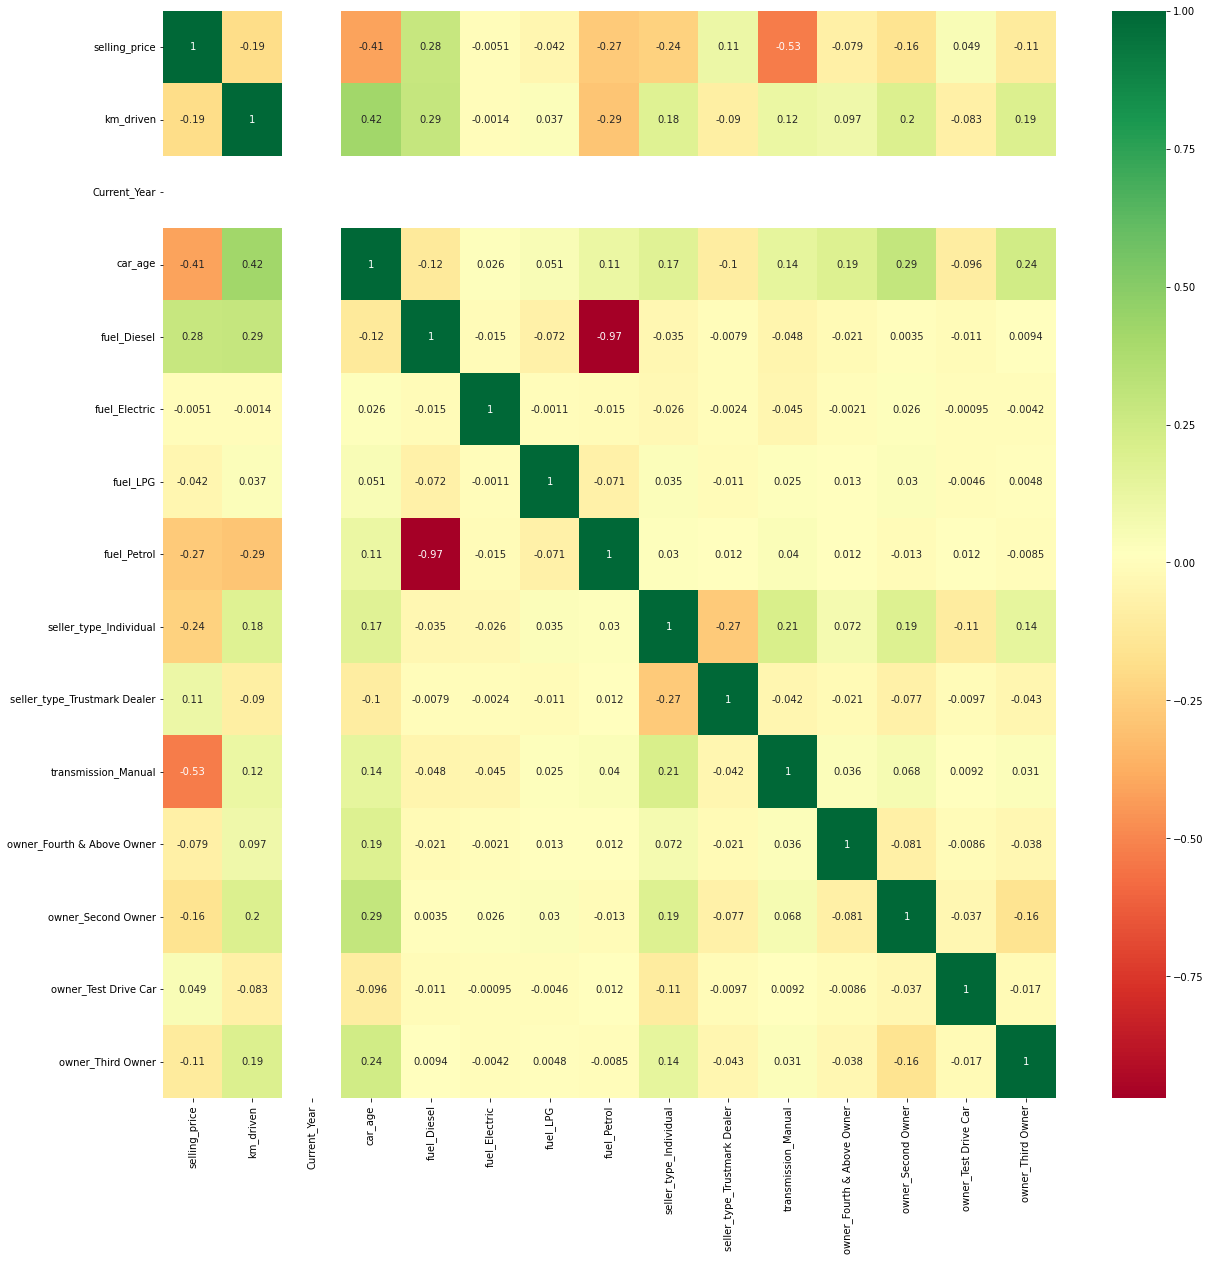

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = final_dataset.corr()
top_corr_features = corrmat.index

plt.figure(figsize = (20, 20))

hmap = sbs.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [ ]:
# Feature Engineering
final_dataset.head()

,selling_price,km_driven,Current_Year,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
# Dependent and Independent features
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [ ]:
X.head()

,km_driven,Current_Year,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

print(model.feature_importances_)

[2.43569648e-01 0.00000000e+00 2.52889025e-01 1.29541127e-01
 4.42398601e-05 2.57949451e-05 2.00202582e-04 4.53624813e-02
 8.12400260e-03 2.92836113e-01 7.97366737e-04 2.19120944e-02
 5.17060748e-04 4.18084277e-03]


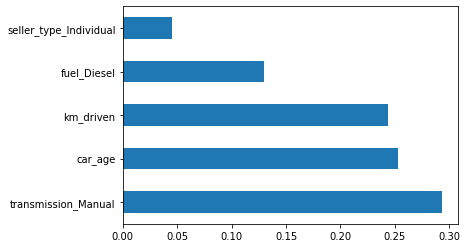

In [ ]:
feat = pd.Series(model.feature_importances_, index = X.columns)
feat.nlargest(5).plot(kind = 'barh')
plt.show()

In [ ]:
# Training ML model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

X_train.shape

(3472, 14)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs= 1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
rf_random.best_score_

-116589984638.61736

In [ ]:
predictions = rf_random.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


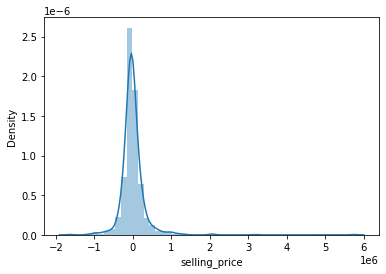

In [ ]:
sbs.distplot(Y_test-predictions)

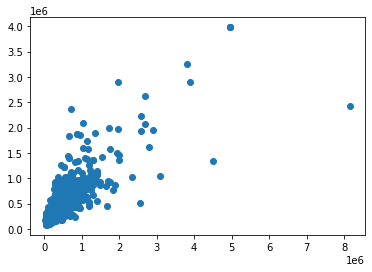

In [ ]:
plt.scatter(Y_test,predictions)

In [ ]:
# calculate Mean Absolute Error(MAE),Mean Squared Error(MSE)
from sklearn import metrics
metrics.mean_absolute_error(Y_test,predictions)



177529.88118269338

In [ ]:
metrics.mean_squared_error(Y_test,predictions)

124291533540.47217